# Goal: Create customer profiles using clustering methods and customer purchase history

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import spearmanr

import wrangle_profiles as wp

##  Wrangle

In [2]:
df = wp.get_prepared_profiles_data()
df.head()

,accessories,board_games,concessions,modeling_supplies,role_playing_games,minis_models,trading_card_games,other,game_room_rental,all_items,...,accessories_scaled,board_games_scaled,concessions_scaled,modeling_supplies_scaled,role_playing_games_scaled,minis_models_scaled,trading_card_games_scaled,other_scaled,game_room_rental_scaled,all_items_scaled
0,4,2,3,0,1,0,7,2,0,19,...,0.276782,0.691483,-0.064347,-0.163817,0.660698,-0.152843,0.047436,0.068790,-0.072521,0.024577
1,4,0,0,0,0,0,0,3,0,7,...,0.276782,-0.283629,-0.153649,-0.163817,-0.153594,-0.152843,-0.178626,0.235163,-0.072521,-0.151857
2,0,0,0,0,0,0,30,0,0,30,...,-0.323317,-0.283629,-0.153649,-0.163817,-0.153594,-0.152843,0.790212,-0.263954,-0.072521,0.186307
3,0,0,0,0,0,0,1,0,0,1,...,-0.323317,-0.283629,-0.153649,-0.163817,-0.153594,-0.152843,-0.146331,-0.263954,-0.072521,-0.240073
4,0,0,0,0,0,0,11,1,0,12,...,-0.323317,-0.283629,-0.153649,-0.163817,-0.153594,-0.152843,0.176615,-0.097582,-0.072521,-0.078343


## Explore 

### What does an average customer's spending habits look like?

In [3]:
cats = ['accessories', 
        'board_games', 
        'concessions', 
        'modeling_supplies',
        'role_playing_games', 
        'minis_models', 
        'trading_card_games', 
        'game_room_rental',
        'net_sales']


df[cats].describe()[1:3]

,accessories,board_games,concessions,modeling_supplies,role_playing_games,minis_models,trading_card_games,game_room_rental,net_sales
mean,2.155090,0.581737,5.161677,1.259880,0.188623,0.775150,5.531138,0.088623,219.853494
std,6.666569,2.051354,33.598891,7.691927,1.228245,5.072288,30.969576,1.222207,965.381666


Judging from the mean and relatively large standard deviation across all categories the customer population is highly segmented. Penning down the habbits of an average customer would be difficult and likely not as helpful as identifying customer clusteres withen the data.

### How many customers does each category appeal to? 

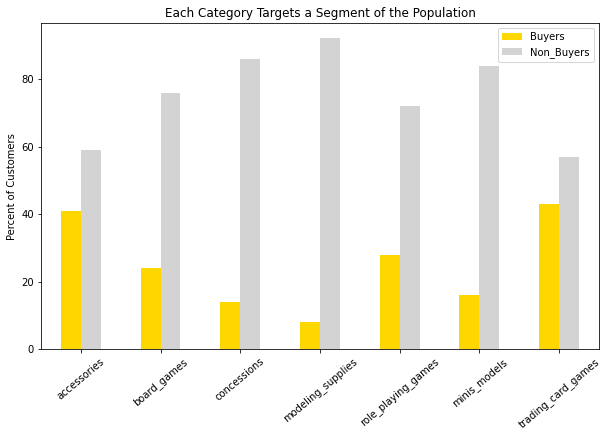

In [4]:
cats = ['accessories', 
        'board_games', 
        'concessions', 
        'modeling_supplies',
        'role_playing_games', 
        'minis_models', 
        'trading_card_games']

buyers = [round(len(df[df['accessories'] > 0]) / len(df)*100),
          round(len(df[df['board_games'] > 0]) / len(df)*100),
          round(len(df[df['modeling_supplies'] > 0]) / len(df)*100),
          round(len(df[df['role_playing_games'] > 0]) / len(df)*100),
          round(len(df[df['concessions'] > 0]) / len(df)*100),
          round(len(df[df['minis_models'] > 0]) / len(df)*100),
          round(len(df[df['trading_card_games'] > 0]) / len(df)*100)]
    
non_buyers = [round(len(df[df['accessories'] == 0]) / len(df)*100),
              round(len(df[df['board_games'] == 0]) / len(df)*100),
              round(len(df[df['modeling_supplies'] == 0]) / len(df)*100),
              round(len(df[df['role_playing_games'] == 0]) / len(df)*100),
              round(len(df[df['concessions'] == 0]) / len(df)*100),
              round(len(df[df['minis_models'] == 0]) / len(df)*100),
              round(len(df[df['trading_card_games'] == 0]) / len(df)*100)]

data = { 'Category':cats,
         'Buyers':buyers,
         'Non_Buyers':non_buyers}

df_data = pd.DataFrame(data)

df_data.set_index('Category', inplace=True)

df_data.plot(kind='bar', figsize=(10, 6), color = ['gold', 'lightgrey'])

plt.xticks(rotation=40)

plt.xlabel('')
plt.ylabel('Percent of Customers')
plt.title('Each Category Targets a Segment of the Population')


plt.show()

### Are customers who buy one type of product more or less likely to buy a different type of product?

In [6]:
for cat_1 in cats:

    df_cata = df[df[cat_1] > 0]

    total = len(df_cata)
    
    print()
    print(f'{total} Customers bought one or more {cat_1.upper()}')

    for cat_2 in cats:

        if cat_1 != cat_2:

            print(f'{round(len(df_cata[df_cata[cat_2] > 0])/total*100)}% also bought {cat_2}')


1376 Customers bought one or more ACCESSORIES
22% also bought board_games
36% also bought concessions
15% also bought modeling_supplies
12% also bought role_playing_games
20% also bought minis_models
49% also bought trading_card_games
3% also bought game_room_rental

785 Customers bought one or more BOARD_GAMES
38% also bought accessories
30% also bought concessions
15% also bought modeling_supplies
13% also bought role_playing_games
20% also bought minis_models
25% also bought trading_card_games
3% also bought game_room_rental

929 Customers bought one or more CONCESSIONS
53% also bought accessories
26% also bought board_games
21% also bought modeling_supplies
12% also bought role_playing_games
25% also bought minis_models
49% also bought trading_card_games
4% also bought game_room_rental

479 Customers bought one or more MODELING_SUPPLIES
42% also bought accessories
25% also bought board_games
41% also bought concessions
15% also bought role_playing_games
52% also bought minis_model

In [9]:
cats = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games']

combs = combinations(cats, 2)

for item in combs:
    
    
    
    correlation, p_value = spearmanr(df[item[0]], df[item[1]])
    
    if p_value < .05:

        print()
        print(f'{item[0]} and {item[1]}')
        print("Spearman correlation:", correlation)
        print("p-value:", p_value)


accessories and concessions
Spearman correlation: 0.2365143664980289
p-value: 1.0944588758946138e-43

accessories and modeling_supplies
Spearman correlation: 0.04509626954795598
p-value: 0.009144954309296462

accessories and role_playing_games
Spearman correlation: 0.1675591532257989
p-value: 1.8615439253111053e-22

accessories and minis_models
Spearman correlation: 0.1207351238289012
p-value: 2.548270088223249e-12

accessories and trading_card_games
Spearman correlation: 0.20995567352672279
p-value: 1.3733306840361075e-34

board_games and concessions
Spearman correlation: 0.07090749573768915
p-value: 4.103611097055358e-05

board_games and role_playing_games
Spearman correlation: 0.11553988063420273
p-value: 2.1229733969209567e-11

board_games and minis_models
Spearman correlation: 0.07352277376277924
p-value: 2.106914381649912e-05

board_games and trading_card_games
Spearman correlation: -0.15544217519774206
p-value: 1.6395253103355465e-19

concessions and modeling_supplies
Spearman 

In [ ]:
for com in combs:
    
    

In [ ]:
df_cats = df[['accessories', 
                  'board_games', 
                  'concessions', 
                  'modeling_supplies',
                  'role_playing_games', 
                  'minis_models', 
                  'trading_card_games', 
                  'other',
                  'game_room_rental', 
                  'all_items',
                  'net_sales']]

In [ ]:
df_cats

In [ ]:
cols = ['accessories', 
        'board_games', 
        'concessions', 
        'modeling_supplies',
        'role_playing_games', 
        'minis_models', 
        'trading_card_games', 
        'other',
        'game_room_rental', 
        'all_items',
        'net_sales']

for col in cols:
    
    df[cols].hist(col, bins = 50)
    plt.show()
    
    

In [ ]:
df.hist('accessories', bins = 50)

In [ ]:
df[raw_num].describe()

In [ ]:
for col in raw_num:
    
    print()
    print(col.upper())
    print()
    print (f'{round(len(df[df[col] > 0]) / len(df)*100)}% buyers')
    print (f'{round(len(df[df[col] == 0]) / len(df)*100)}% NON-buyers')
    

In [ ]:
df[raw_num]

In [ ]:
df[raw_num][df.trading_card_games > 0].describe()

In [ ]:
df[raw_num][df.accessories > 0].describe()

In [ ]:
df[raw_num][df.concessions > 0].describe()

In [ ]:
df[raw_num][df.modeling_supplies > 0].describe()

In [ ]:
sns.heatmap(df)

In [ ]:
cols = ['accessories', 
        'board_games', 
        'concessions',
        'modeling_supplies', 
        'role_playing_games', 
        'minis_models',
        'trading_card_games',
        'game_room']

for col in cols:
    
    
    print(col, 'Hist')
    
    plt.hist(df[raw_num][df[col] > 0])
    
    plt.show()